# Exploratory Data Analysis 

## Introduction

## Imports

In [1]:
## Import libraries and packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import warnings

## Load Dataset

In [2]:
# Load data into a pandas DataFrame

df = pd.read_csv('Wrangled_real_estate_data.csv')

In [3]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          150930 non-null  object 
 1   bed             125904 non-null  float64
 2   bath            127537 non-null  float64
 3   acre_lot        114685 non-null  float64
 4   city            150895 non-null  object 
 5   state           150930 non-null  object 
 6   zip_code        150884 non-null  float64
 7   house_size      102241 non-null  float64
 8   prev_sold_date  78681 non-null   object 
 9   price           150930 non-null  float64
dtypes: float64(6), object(4)
memory usage: 11.5+ MB


In [5]:
print(df.shape)

(150930, 10)


In [6]:
# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isna().sum())


Missing values in each column:
status                0
bed               25026
bath              23393
acre_lot          36245
city                 35
state                 0
zip_code             46
house_size        48689
prev_sold_date    72249
price                 0
dtype: int64


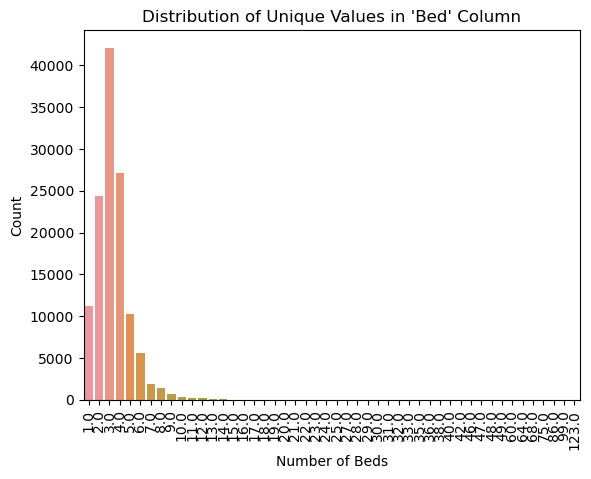

In [7]:
# Visualize the unique values in the 'bed' column
sns.countplot(x='bed', data=df)

# labels
_=plt.title("Distribution of Unique Values in 'Bed' Column")
_=plt.xlabel("Number of Beds")
_=plt.xticks(rotation=90)
_=plt.ylabel("Count")

# Display
plt.show()

In [8]:
# Calculate the mode for bed column
bed_mode = df['bed'].mode()[0]
bed_mode

# Impute missing values in the 'bed' column with its mode
df['bed'].fillna(bed_mode, inplace=True)

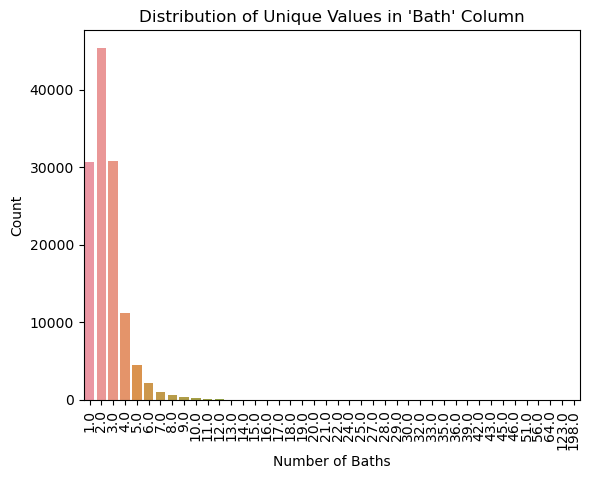

In [9]:
# Visualize the unique values in the 'bath' column
sns.countplot(x='bath', data=df)

# labels
_=plt.title("Distribution of Unique Values in 'Bath' Column")
_=plt.xlabel("Number of Baths")
_=plt.xticks(rotation=90)
_=plt.ylabel("Count")

# Display
plt.show()

In [10]:
# Calculate the mode for bath column
bath_mode = df['bath'].mode()[0]
bath_mode
# Impute missing values in the 'bath' column with its mode
df['bath'].fillna(bath_mode, inplace=True)

In [11]:
# Calculate the mode of th house_size feature. Select the first element, since the mode may return a series
house_size_mean = df['house_size'].mean()
house_size_mode = df['house_size'].mode()[0]
house_size_median = df['house_size'].median()
print(f'The house_size mean is: {house_size_mean}')
print(f'House_size mode is: {house_size_mode} and the median is: {house_size_median}')

The house_size mean is: 2165.275994953101
House_size mode is: 1200.0 and the median is: 1690.0


In [12]:
# Calculate the percentage of missing data in house_size column
missing_house_size = (df['house_size'].isna().sum() / len(df['house_size'])) * 100

# Print
print(f"Percentage of missing data in 'house_size' column: {missing_house_size:.2f}%")

Percentage of missing data in 'house_size' column: 32.26%


In [13]:
# Calculate the mode for house_size column
house_size_mode = df['house_size'].mode()[0]
house_size_mode
# Impute missing values in the 'house_size' column with its mode
df['house_size'].fillna(house_size_mode, inplace=True)

In [14]:
# Calculate the mode of the acre_lot feature. Select the first element, since the mode may return a series
acre_lot_mode = df['acre_lot'].mode()[0]
# Calculate the median
acre_lot_median = df['acre_lot'].median()
# Calculate the mean
acre_lot_mean = df['acre_lot'].mean()
print(f"The mode is:  {acre_lot_mode} and the median is:  {acre_lot_median}.")
print(f'The mean is: {acre_lot_mean}.')

The mode is:  0.11 and the median is:  0.28.
The mean is: 26.428146313816104.


In [15]:
# Calculate the percentage of missing data in acre_lot column
missing_acre_lot = (df['acre_lot'].isna().sum() / len(df['acre_lot'])) * 100

# Print
print(f"Percentage of missing data in 'acre_lot' column: {missing_acre_lot:.2f}%")

Percentage of missing data in 'acre_lot' column: 24.01%


In [16]:
# Calculate the mode for acre_lot column
acre_lot_mode = df['acre_lot'].mode()[0]
acre_lot_mode
# Impute missing values in the 'acre_lot' column with its mode
df['acre_lot'].fillna(acre_lot_mode, inplace=True)

In [17]:
# Forward fill the missing values in the 'city' and 'zip_code' columns
df[['city', 'zip_code']] = df[['city', 'zip_code']].fillna('ffill')

# Check to verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          150930 non-null  object 
 1   bed             150930 non-null  float64
 2   bath            150930 non-null  float64
 3   acre_lot        150930 non-null  float64
 4   city            150930 non-null  object 
 5   state           150930 non-null  object 
 6   zip_code        150930 non-null  object 
 7   house_size      150930 non-null  float64
 8   prev_sold_date  78681 non-null   object 
 9   price           150930 non-null  float64
dtypes: float64(5), object(5)
memory usage: 11.5+ MB


## Handling Outliers

Number of numerical variables:  5


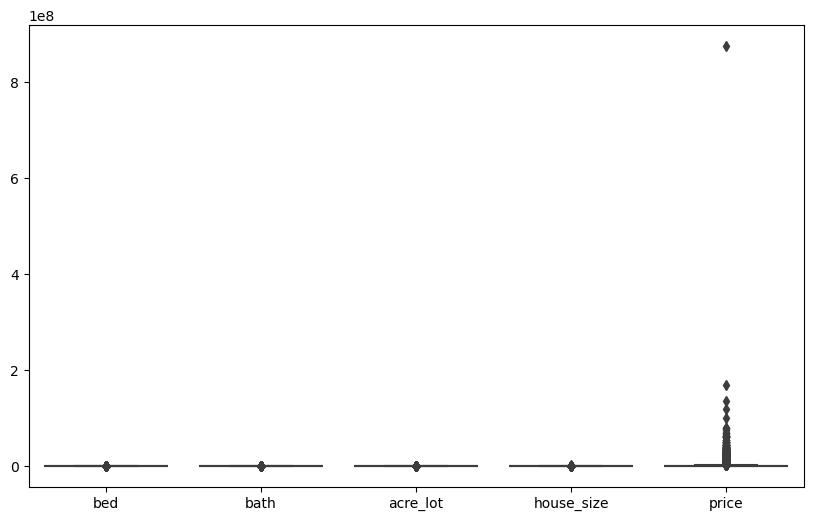

In [18]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise outliers in the numerical variables using boxplots
_=plt.figure(figsize=(10, 6))
_=sns.boxplot(df[numerical_features])

plt.show()

In [19]:
def drop_outliers(df):
    """ The function iterates through numeric columns in a DataFrame, identifies outliers using IQR, and returns a new DataFrame with outliers removed."""
    new_df = df.copy()  # Create a copy to avoid modifying the original
    
    for col in df.select_dtypes(include=['number']):
        Q1 = new_df[col].quantile(0.25)
        Q3 = new_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        # Filter outliers
        outliers = (new_df[col] < lower_bound) | (new_df[col] > upper_bound)
       
        # Drop outliers from the copy
        new_df = new_df[~outliers]

    return new_df

df2 = drop_outliers(df)
df2.shape

(89627, 10)

C:\Users\MTIDES\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


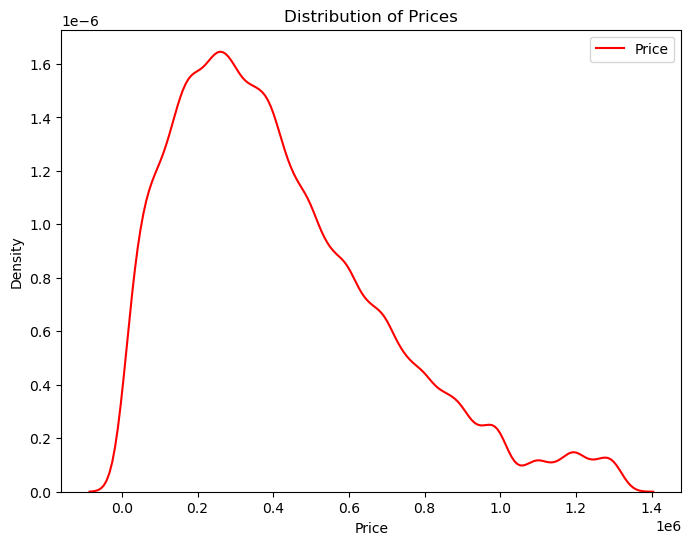

In [20]:
# A density plot (KDE) of the 'price' column
plt.figure(figsize=(8, 6))
sns.kdeplot(df2['price'], fill=False, color='r', label='Price')

# Labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Prices')
plt.legend()

# Display
plt.show();

In [21]:
# The number of data values less than 100000 in the 'price' column
less_than_100k_count = (df2['price'] < 100000).sum()
print(less_than_100k_count)

9011


There are 9078 houses that are priced at less than $100000.

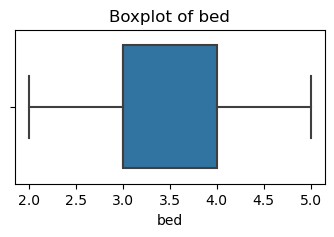

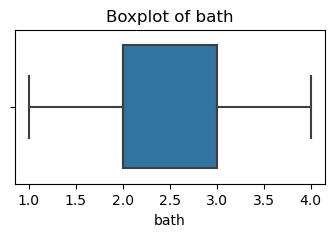

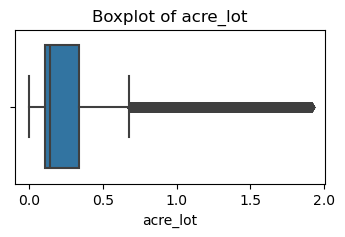

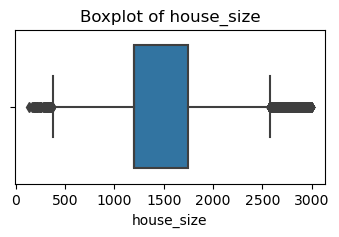

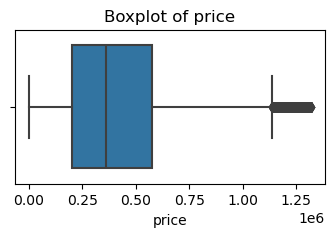

In [22]:
# Check for outliers using boxplot
for col in df2.loc[:, df.dtypes == np.number]:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=col, data=df2)
    plt.title(f"Boxplot of {col}")
    plt.show();